<a href="https://colab.research.google.com/github/ShrutiChrist/Computer-Vision/blob/main/Lab8_2348545(CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge Detection Methods

## First Order Derivative Methods.

### Sobel Operator

(-0.5, 1199.5, 799.5, -0.5)

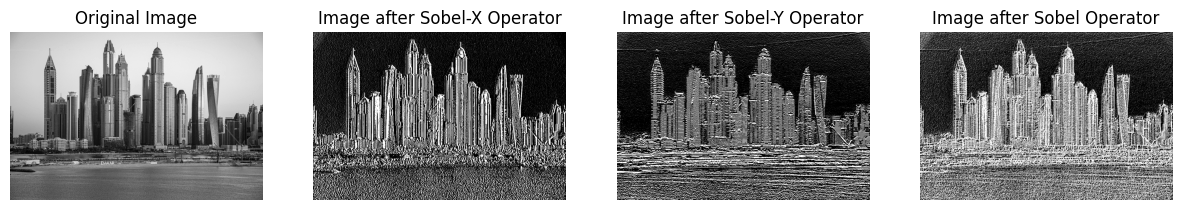

In [1]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
img = cv2.imread('//content/Dubai_Marina_Skyline.jpg',0)
img_gaussian = cv2.GaussianBlur(img,(3,3),0)
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after Sobel-X Operator")
plt.imshow(img_sobelx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after Sobel-Y Operator")
plt.imshow(img_sobely,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after Sobel Operator")
plt.imshow(img_sobel,"gray")
plt.axis("off")

The Sobel operator is primarily used for edge detection in images. Specifically, it is used to highlight the edges or boundaries between objects in an image by calculating the gradient magnitude

### Prewitt Operator

(-0.5, 1199.5, 799.5, -0.5)

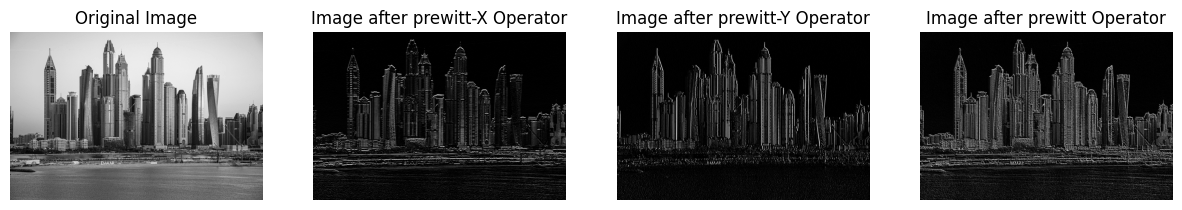

In [2]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after prewitt-X Operator")
plt.imshow(img_prewittx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after prewitt-Y Operator")
plt.imshow(img_prewitty,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after prewitt Operator")
plt.imshow(img_prewitt,"gray")
plt.axis("off")

The Prewitt operator, like the Sobel operator, is used for edge detection in images. It calculates the gradient magnitude of an image to identify edges, but it uses a slightly different approach compared to the Sobel operator.

### Roberts Cross Operator

(-0.5, 1199.5, 799.5, -0.5)

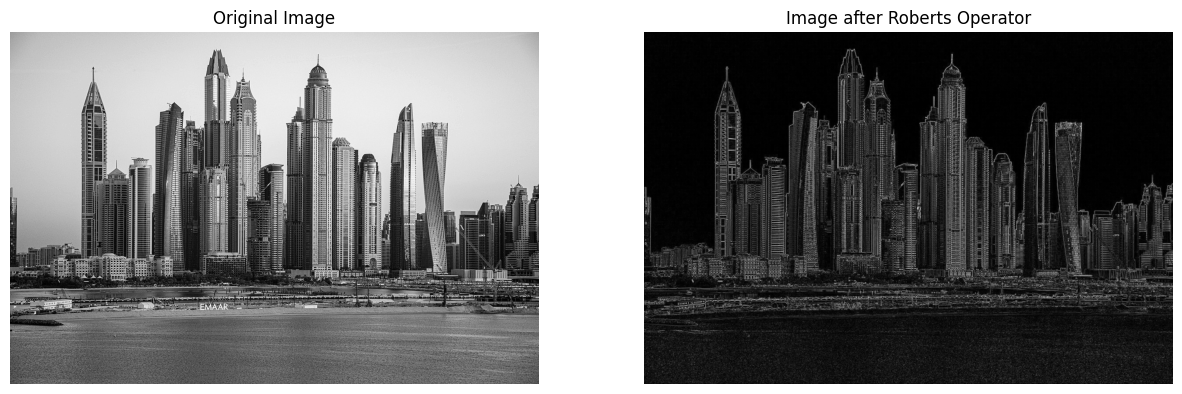

In [4]:
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )
img = cv2.imread('/content/Dubai_Marina_Skyline.jpg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Roberts Operator")
plt.imshow(edged_img,"gray")
plt.axis("off")

The Roberts Cross operator is another edge detection technique used in image processing. Like the Sobel and Prewitt operators, it's primarily employed to detect edges or boundaries in images. The Roberts Cross operator detects edges by computing the gradient magnitude using a pair of 2x2 kernels. These kernels are simple and diagonal, which allows the operator to respond strongly to edges with a diagonal orientation.

## Second Order Derivative Methods.

### Laplacian Operator

(-0.5, 1199.5, 799.5, -0.5)

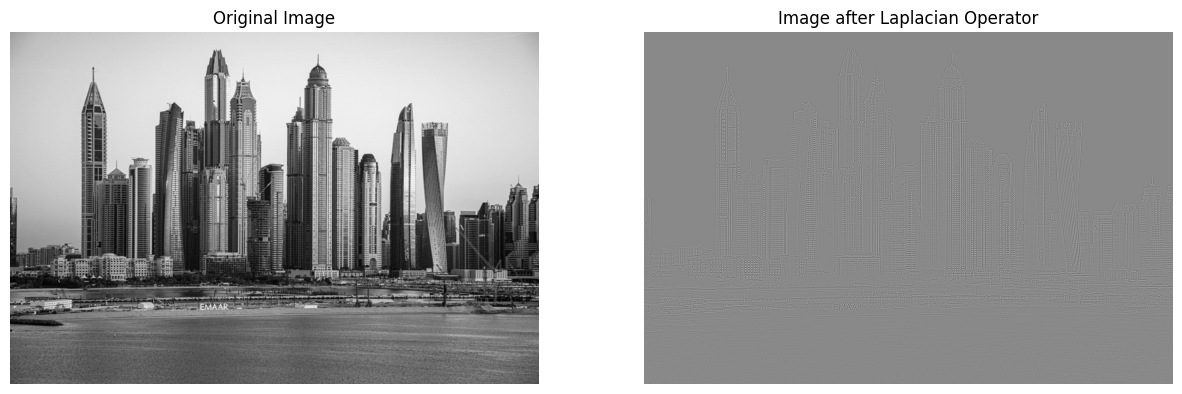

In [10]:
# Apply Laplacian operator
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Normalize Laplacian to [0, 255]
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display results
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image,"gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Image after Laplacian Operator")
plt.imshow(laplacian,"gray")
plt.axis("off")

A Laplacian filter is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression.

### LoG-Laplacian of Gaussian

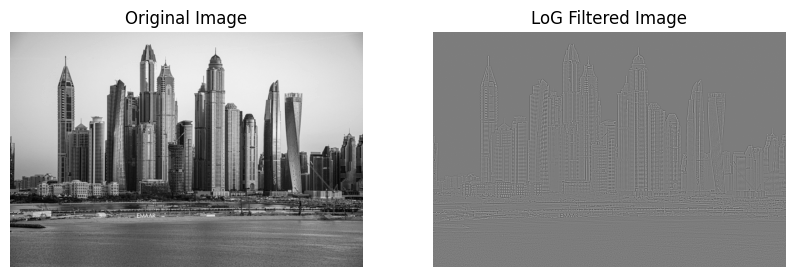

In [7]:
img = cv2.imread('/content/Dubai_Marina_Skyline.jpg',0)
image = cv2.GaussianBlur(img, (3, 3), 0)
filtered_image = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(filtered_image,cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')
plt.show()

The Laplacian of Gaussian (LoG) filter is a popular edge detection technique that combines Gaussian smoothing with the Laplacian operator to enhance the detection of edges in images.

## Optimum Edge Detection Method

### Canny Edge Detector

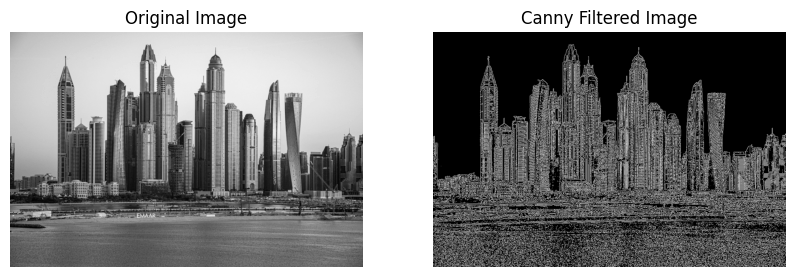

In [8]:
canny_edges = cv2.Canny(img, 100,100)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(canny_edges,cmap='gray')
plt.title('Canny Filtered Image')
plt.axis('off')
plt.show()

Canny Edge Detection is a popular edge detection algorithm. It is a multi-stage algorithm. Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. It helps in finding Intensity Gradient of the Image

### Marr-Hildreth Edge Detector (Laplacian of Gaussian)

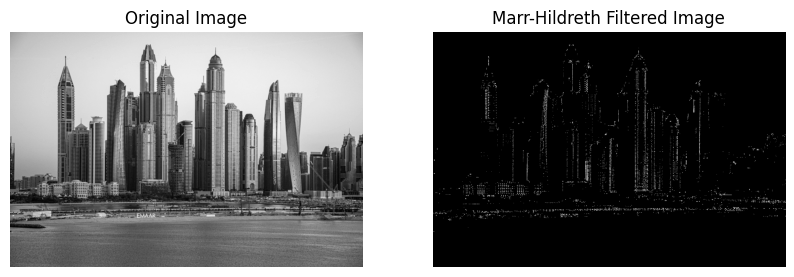

In [9]:
blurred = cv2.GaussianBlur(img, (5, 5), 1.4)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
zero_crossings = cv2.threshold(np.uint8(np.absolute(laplacian)), 30, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(zero_crossings,cmap='gray')
plt.title('Marr-Hildreth Filtered Image')
plt.axis('off')
plt.show()

The Marr-Hildreth edge detection method, also known as the Laplacian of Gaussian (LoG) method, is an optimal edge detection technique that combines Gaussian smoothing with the Laplacian operator to enhance the detection of edges in images.